In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

# 1. Qubit Spec

### 1.1 Time Independent Hamiltonian

In [171]:
num_levels = 2
a = qt.destroy(num_levels)

a1 = qt.tensor(a, qt.qeye(num_levels))
a2 = qt.tensor(qt.qeye(num_levels), a)

omega_1 = 4.5 * 2 * np.pi  # GHz
omega_2 = 4.5 * 2 * np.pi  # GHz

U = 0.2 * 2 * np.pi  # GHz
J = 0.01 * 2 * np.pi  # GHz

times = np.linspace(0, 100, 1001)  # ns

psi0 = qt.basis([num_levels, num_levels], [1, 0])

e_ops = [a1.dag()*a1, a2.dag()*a2]

H = 0

H += omega_1 * a1.dag() * a1 + omega_2 * a2.dag() * a2
H += U/2*(a1.dag()*a1)*(a1.dag()*a1 - 1) + U/2*(a2.dag()*a2)*(a2.dag()*a2 - 1)
H += J * (a1.dag() * a2 + a2.dag() * a1)

In [172]:
result = qt.sesolve(H, psi0, times, e_ops=e_ops)

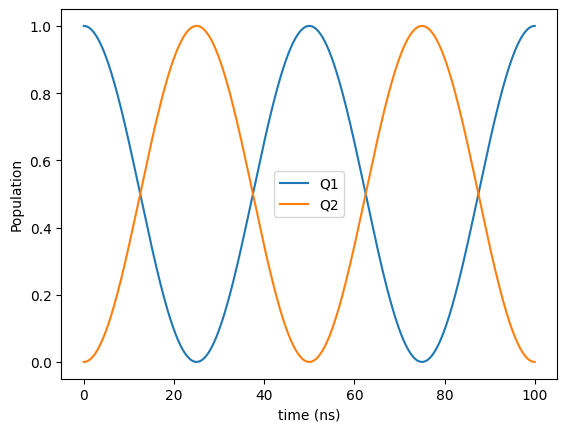

In [173]:
plt.plot(times, result.expect[0], label='Q1')
plt.plot(times, result.expect[1], label='Q2')

plt.xlabel('time (ns)')
plt.ylabel('Population')

plt.legend()
plt.show()

In [174]:
def drive_coeff(t, args):
    frequency = args['frequency']
    phase = args['phase']
    amplitude = args['amplitude']
    return amplitude * np.cos(frequency * t + phase)

In [206]:
num_levels = 2
a = qt.destroy(num_levels)

a1 = qt.tensor(a, qt.qeye(num_levels))
a2 = qt.tensor(qt.qeye(num_levels), a)

omega_1 = 4.4 * 2 * np.pi  # GHz
omega_2 = 4.5 * 2 * np.pi  # GHz

U = 0.2 * 2 * np.pi  # GHz
J = 0.01 * 2 * np.pi  # GHz

times = np.linspace(0, 500, 1001)  # ns

psi0 = qt.basis([num_levels, num_levels], [1, 0])

e_ops = [a1.dag()*a1, a2.dag()*a2]

args = {'frequency': 0.100 * 2 * np.pi,
        'amplitude': 0 * 2 * np.pi,
        'phase': 0}

H = 0

H += omega_1 * a1.dag() * a1 + omega_2 * a2.dag() * a2
H += U/2*(a1.dag()*a1)*(a1.dag()*a1 - 1) + U/2*(a2.dag()*a2)*(a2.dag()*a2 - 1)
H += J * (a1.dag() * a2 + a2.dag() * a1)


H = [H, [a1.dag()*a1, drive_coeff]]

In [207]:
result = qt.sesolve(H, psi0, times, e_ops=e_ops, args=args)

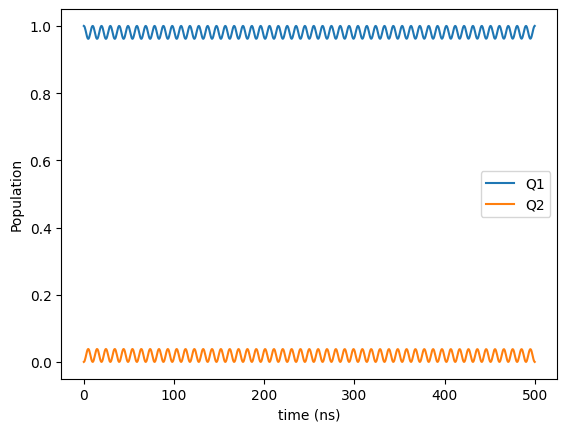

In [208]:
plt.plot(times, result.expect[0], label='Q1')
plt.plot(times, result.expect[1], label='Q2')

plt.xlabel('time (ns)')
plt.ylabel('Population')

plt.legend()
plt.show()

In [221]:
num_levels = 2
a = qt.destroy(num_levels)

a1 = qt.tensor(a, qt.qeye(num_levels))
a2 = qt.tensor(qt.qeye(num_levels), a)

omega_1 = 4.4 * 2 * np.pi  # GHz
omega_2 = 4.5 * 2 * np.pi  # GHz

U = 0.2 * 2 * np.pi  # GHz
J = 0.01 * 2 * np.pi  # GHz

times = np.linspace(0, 500, 101)  # ns

psi0 = qt.basis([num_levels, num_levels], [1, 0])

e_ops = [a1.dag()*a1, a2.dag()*a2]

args = {'frequency': 0.100 * 2 * np.pi,
        'amplitude': 0.05 * 2 * np.pi,
        'phase': 0}


H = 0

H += omega_1 * a1.dag() * a1 + omega_2 * a2.dag() * a2
H += U/2*(a1.dag()*a1)*(a1.dag()*a1 - 1) + U/2*(a2.dag()*a2)*(a2.dag()*a2 - 1)
H += J * (a1.dag() * a2 + a2.dag() * a1)


H = [H, [a1.dag()*a1, drive_coeff]]


drive_frequencies = np.linspace(0.05, 0.15, 21) * 2 * np.pi

populations = np.zeros((2, len(drive_frequencies), len(times)))



for i in range(len(drive_frequencies)):
        args['frequency'] = drive_frequencies[i]
        result = qt.sesolve(H, psi0, times, e_ops=e_ops, args=args)
        populations[0,i,:] = result.expect[0]
        populations[1,i,:] = result.expect[1]

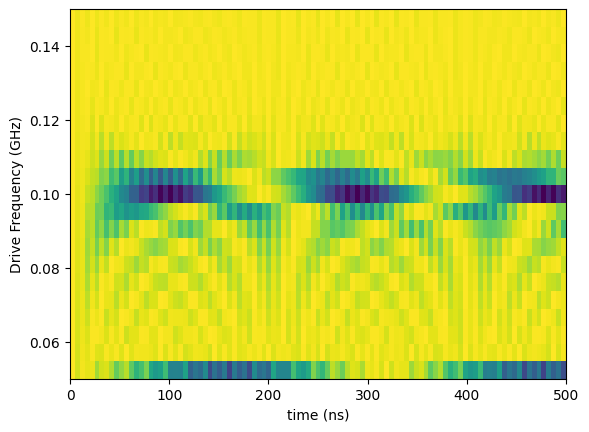

In [222]:
plt.imshow(populations[0,:,:], aspect='auto', interpolation='none',
           extent=[times[0], times[-1], drive_frequencies[0]/2/np.pi, drive_frequencies[-1]/2/np.pi], 
           origin='lower')

plt.xlabel('time (ns)')
plt.ylabel('Drive Frequency (GHz)')
plt.show()

In [ ]:
num_levels = 2


omega = 4 * 2 * np.pi # GHz
Omega = 0.1 * 2 * np.pi # GHz

T1 = 20e3 # ns
gamma_1 = 2*np.pi / T1

# T2 = 2T1
# gamma_2 = gamma_1 / 2 + gamma_phi
# gamma_phi = gamma_1 / 2 - gamma_2

T2 = 10e3 # ns

T2 = min(T2, 2*T1)
gamma_2 = 2*np.pi / T2
gamma_phi = gamma_2 - gamma_1 / 2

a = qt.destroy(num_levels)

c_ops = [a * np.sqrt(gamma_1), a.dag()*a * np.sqrt(gamma_phi)]
e_ops = [a.dag()*a]

times = np.linspace(0, 10, 101)
psi0 = qt.basis(num_levels, 0)

H = (omega - omega*1/2) * a.dag() * a + Omega * (a + a.dag())





In [86]:
result = qt.mesolve(H, psi0, times, c_ops=c_ops, e_ops=e_ops)


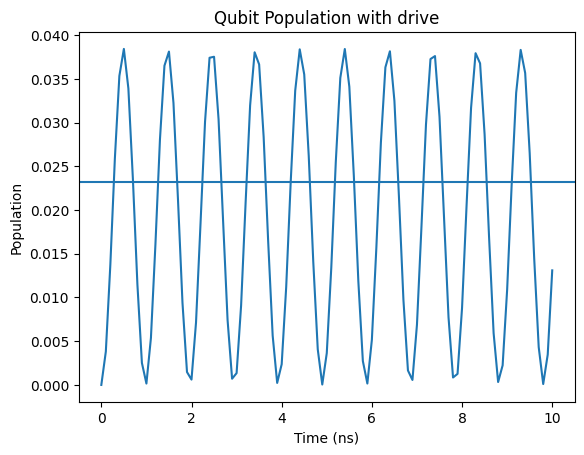

In [87]:
populations = result.expect[0]
populations_rms = np.sqrt(np.mean(np.power(populations, 2)))

plt.plot(times, populations)
plt.axhline(populations_rms)
plt.xlabel('Time (ns)')
plt.ylabel('Population')

plt.title('Qubit Population with drive')


plt.show()

In [135]:
drive_frequencies = np.linspace(3.9, 4.1, 101) * 2 * np.pi
times = np.linspace(0, 200, 101)

Omega = 0.01 * 2 * np.pi # GHz
psi0 = qt.basis(num_levels, 0)


populations = np.zeros((len(drive_frequencies), len(times)))

for i in range(len(drive_frequencies)):
    H = (omega - drive_frequencies[i]) * a.dag() * a + Omega * (a + a.dag())
    result = qt.mesolve(H, psi0, times, c_ops=c_ops, e_ops=e_ops)
    populations[i, :] = result.expect[0]

populations_rms = np.sqrt(np.mean(np.power(populations, 2), axis=1))

print(populations_rms.shape)

(101,)


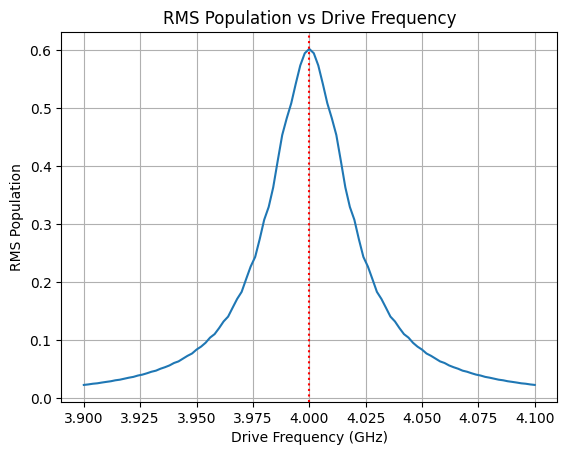

In [136]:
plt.plot(drive_frequencies/(2*np.pi), populations_rms)
plt.axvline(omega/(2*np.pi), color='red', linestyle=':', label='Qubit Frequency')
plt.xlabel("Drive Frequency (GHz)")
plt.ylabel("RMS Population")
plt.title("RMS Population vs Drive Frequency")
plt.grid()
plt.show()

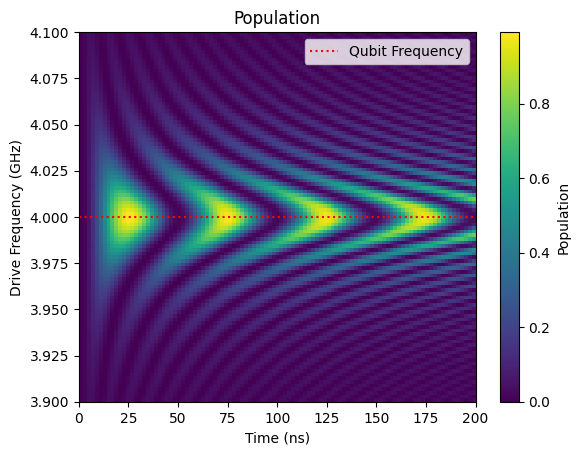

In [137]:
plt.imshow(populations, extent=[times[0], times[-1], drive_frequencies[0]/(2*np.pi), drive_frequencies[-1]/(2*np.pi)], interpolation='none', aspect='auto', origin='lower')
plt.axhline(omega/(2*np.pi), color='red', linestyle=':', label='Qubit Frequency')
plt.xlabel("Time (ns)")
plt.ylabel("Drive Frequency (GHz)")
plt.title("Population")
plt.colorbar(label="Population")
plt.legend()
plt.show()


### 1.2 Time Depdendent Floquet Hamiltonian

In [107]:
def drive_coefficient(t, args):
    frequency = args['frequency']
    phase = args['phase']
    amplitude = args['amplitude']
    return amplitude * np.cos(frequency * t + phase)

In [156]:
### Floquet Hamiltonian

drive_frequencies = np.linspace(3.8, 4.2, 501) * 2 * np.pi
times = np.linspace(0, 200, 101)


modulation_frequency = 0.1 * 2 * np.pi  # modulation frequency
modulation_amplitude = 0.1 * 2 * np.pi  # modulation amplitude

args = {'frequency': modulation_frequency, 'phase': 0, 'amplitude': modulation_amplitude}


populations = np.zeros((len(drive_frequencies), len(times)))

for i in range(len(drive_frequencies)):
    H0 = (omega - drive_frequencies[i]) * a.dag() * a + Omega * (a + a.dag())

    H = [H0, [a.dag()*a, drive_coefficient]]

    result = qt.mesolve(H, psi0, times, c_ops=c_ops, e_ops=e_ops, args=args)
    populations[i, :] = result.expect[0]

populations_rms = np.sqrt(np.mean(np.power(populations, 2), axis=1))


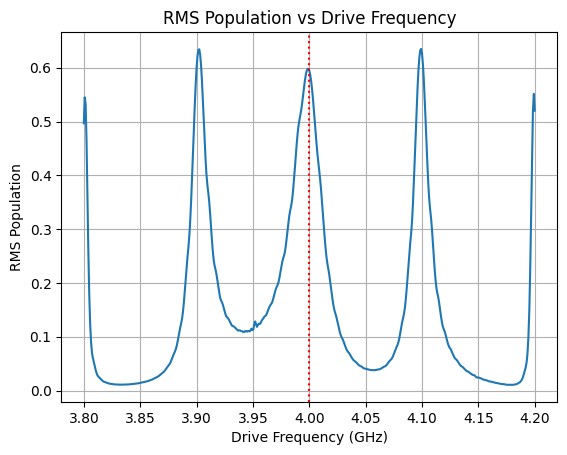

In [158]:
plt.plot(drive_frequencies/(2*np.pi), populations_rms)
plt.axvline(omega/(2*np.pi), color='red', linestyle=':', label='Qubit Frequency')
plt.xlabel("Drive Frequency (GHz)")
plt.ylabel("RMS Population")
plt.title("RMS Population vs Drive Frequency")
plt.grid()
plt.show()

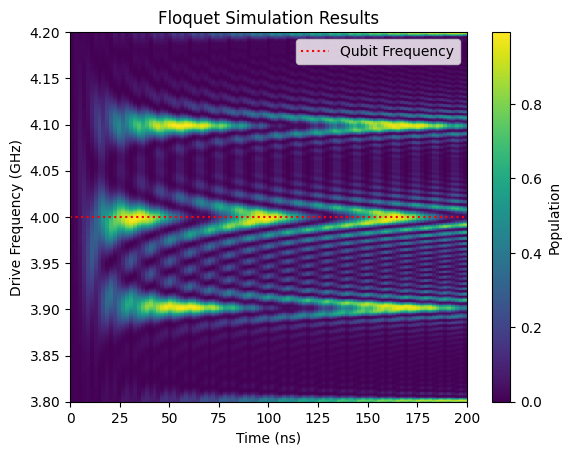

In [159]:
plt.imshow(populations, extent=[times[0], times[-1], drive_frequencies[0]/(2*np.pi), drive_frequencies[-1]/(2*np.pi)], interpolation='none', aspect='auto', origin='lower')
plt.axhline(omega/(2*np.pi), color='red', linestyle=':', label='Qubit Frequency')
plt.xlabel("Time (ns)")
plt.ylabel("Drive Frequency (GHz)")
plt.title("Floquet Simulation Results")
plt.colorbar(label="Population")
plt.legend()
plt.show()
